# Aula 1

## Análise dos Dados

### Bases usadas:
    Dados gerais de músicas;
    Dados relacionados a gêneros;
    Dados relacioandos aos anos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from pandas.core.dtypes.cast import maybe_upcast

import plotly.express as px

import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

#### Importando os dataframes

#### 1 - Análise realizada na Tabela Dados:

In [3]:
dados = pd.read_csv('../data/raw/Dados_totais.csv')
dados_generos = pd.read_csv('../data/raw/data_by_genres.csv')
dados_anos = pd.read_csv('../data/raw/data_by_year.csv')

In [4]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy  explicit                      id  instrumentalness  key  liveness  \
0   0.661         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1   0.806         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   
2   0.864         0  60a0Rd6pjrkxjPbaKzXjfq          0.000000    3    0.2090   
3   0.865         0  6ZOBP3NvffbU4SZcrnt1k6          0.000011   11    0.1680   
4   0.661         1  3yfqSUWxFvZELEM4PmlwIR          0.000000    5    0.0454   

   loudness  mode                 name  popularity  speechiness    tempo  \
0    -7.227     1               Yellow          84       0.0281  173.372   
1    -5.946     0          Ms. Jackson          80       0.2690   94.948   
2    -5.870     0           In the End          84       0.0584  105.143   
3    -5.708     0           Kryptonite          78       0.0286   99.009   
4    -4.244     0  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

## 1- EDA

#### Verificando a quantidade de dados em anos:

In [5]:
dados['year'].value_counts().sort_values(ascending=False)

2020    1150
2018    1080
2010    1059
2015    1021
2002    1003
2012     994
2013     986
2011     979
2009     972
2017     969
2006     958
2005     951
2007     944
2004     943
2001     932
2014     927
2019     913
2003     908
2008     900
2000     867
2016     855
Name: year, dtype: int64

In [6]:
dados['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [7]:
dados.shape

(20311, 19)

#### Deletando as colunas que não serão utilizadas:

In [8]:
dados.drop(columns=['key', 'explicit', 'mode'], axis=1, inplace=True)

In [9]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  
0          84       0.0281  173.372      Coldplay - Yellow  
1          80       0.2690   94.948  OutKast - Ms. Jackson

In [10]:
dados.shape

(20311, 16)

#### Salvando o dataframe como tipo de arquivo Parquet, para uma mehor performance:

In [11]:
dados.to_parquet('../data/raw/dados.parquet')

In [12]:
dados = pd.read_parquet('../data/raw/dados.parquet')
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

#### Verificando dados nulos:

In [13]:
# round(dados.isna().sum()/len(dados)*100)
(dados.isnull().sum()/len(dados)).sort_values(ascending=False)*100

valence             0.0
year                0.0
acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
id                  0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
name                0.0
popularity          0.0
speechiness         0.0
tempo               0.0
artists_song        0.0
dtype: float64

#### Verificando dados duplicados:

In [14]:
dados[dados.duplicated(keep=False)]

Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, id, instrumentalness, liveness, loudness, name, popularity, speechiness, tempo, artists_song]
Index: []

#### Verificando Colunas constantes:

In [15]:
columns_to_drop_constant = []

for col in dados.columns:
    if dados[col].nunique()==1:
        columns_to_drop_constant.append(col)
        print(f'Coluns {col} é constante')
    else:
        continue

In [16]:
columns_to_drop_constant

[]

In [17]:
dados.nunique()

valence              1410
year                   21
acousticness         3698
artists               875
danceability          946
duration_ms         13678
energy               1267
id                  20311
instrumentalness     4123
liveness             1524
loudness             9113
name                18691
popularity             77
speechiness          1269
tempo               16310
artists_song        20311
dtype: int64

In [18]:
import data_cleaning as dc 
dc.encontra_constantes(dados)
# dc.encontra_quasi_constantes(dados)

Não tem coluna constante


[]

#### Verrificando Colunas quasi-constantes:

In [19]:
dados['year'].value_counts(normalize=True)

2020    0.056620
2018    0.053173
2010    0.052139
2015    0.050268
2002    0.049382
2012    0.048939
2013    0.048545
2011    0.048200
2009    0.047856
2017    0.047708
2006    0.047167
2005    0.046822
2007    0.046477
2004    0.046428
2001    0.045886
2014    0.045640
2019    0.044951
2003    0.044705
2008    0.044311
2000    0.042686
2016    0.042095
Name: year, dtype: float64

In [20]:
columns_to_drop_quasi_constant = []

for col in dados.columns:
    if dados[col].value_counts(normalize=True).iloc[0] >= 0.95:
        columns_to_drop_quasi_constant.append(col)
        print(f'Colunas {col} são quasi-constantes')
    else:
        continue
#         return columns_to_drop_quasi_constant

In [21]:
columns_to_drop_quasi_constant

[]

In [22]:
# dados.to_parquet('../data/raw/dados.parquet')
dados = pd.read_parquet('../data/raw/dados.parquet')
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  
0          84       0.0281  173.372      Coldplay - Yellow  
1          80       0.2690   94.948  OutKast - Ms. Jackson

In [23]:
dados.shape

(20311, 16)

#### 2 - Análise realizada na Tabela Dados Gêneros:

In [24]:
# dados_generos.head()

In [25]:
# dados_generos.drop(columns=['mode', 'key'], axis=1, inplace=True)
# dados_generos.head(2)

In [26]:
dados_generos.shape

(2973, 14)

#### Salvando o dataframe como tipo de arquivo Parquet, para uma mehor performance:

In [27]:
dados_generos.to_parquet('../data/raw/dados_generos.parquet')

In [28]:
dados_generos = pd.read_parquet('../data/raw/dados_generos.parquet')
dados_generos.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

#### Verificando dados nulos:

In [29]:
(dados_generos.isna().sum()/len(dados_generos)).sort_values(ascending=False)*100

mode                0.0
genres              0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
key                 0.0
dtype: float64

#### Verificando dados duplicados:

In [30]:
dados_generos[dados_generos.duplicated(keep=False)]

Empty DataFrame
Columns: [mode, genres, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, key]
Index: []

#### Verificando colunas constantes:

In [31]:
dc.encontra_constantes(dados_generos)

Não tem coluna constante


[]

In [32]:
columns_to_drop_quasi_constant = []

for col in dados.columns:
    if dados[col].value_counts(normalize=True).iloc[0] >= 0.95:
        columns_to_drop_quasi_constant.append(col)
        print(f'Colunas {col} são quasi-constantes')
    else:
        continue
#         return columns_to_drop_quasi_constant

In [33]:
columns_to_drop_quasi_constant = []

for col in dados_generos.columns:
    if dados_generos[col].value_counts(normalize=True).iloc[0]>= 0.95:
        columns_to_drop_quasi_constant.append(col)
        print(f'Colunas quasi-constantes {col}')
    else:
        continue
#         return columns_to_drop_quasi_constant

In [34]:
columns_to_drop_quasi_constant

[]

#### 3 - Análise realizada na Tabela Dados Anos:

In [35]:
dados_anos.head(2)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

#### Salvando o dataframe como tipo de arquivo Parquet, para uma mehor performance:

In [36]:
dados_anos.to_parquet('../data/raw/dados_anos.parquet')
dados_anos = pd.read_parquet('../data/raw/dados_anos.parquet')
dados_anos.head(2)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

#### Deletando as colunas que não utilizaremos:

In [37]:
dados_anos.drop(columns=['mode', 'key'], axis=1, inplace=True)
dados_anos.head(2)

year  acousticness  danceability    duration_ms    energy  \
0  1921      0.886896      0.418597  260537.166667  0.231815   
1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  
0    0.653333  
1    0.140845

In [38]:
dados_anos['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

#### Estamos limitando os anos que utilizaremos de acodo com os anos de nossa tabela e dados:

In [39]:
dados_anos = dados_anos[dados_anos['year'] >= 2000]
dados_anos['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [40]:
dados['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

#### Verificando dados nulos:

In [41]:
(dados_anos.isna().sum()/len(dados_anos)).sort_values(ascending=False)*100

year                0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
dtype: float64

#### Verificando dados duplicados:

In [42]:
dados_anos[dados_anos.duplicated(keep=False)]

Empty DataFrame
Columns: [year, acousticness, danceability, duration_ms, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity]
Index: []

#### Verificando dados constantes:

In [43]:
columns_to_drop_constant = []

for col in dados_anos.columns:
    if dados_anos[col].nunique()==1:
        columns_to_drop_constant.append(col)
        print(f'Colunas constantes: {col}')
    else:
        continue

In [44]:
columns_to_drop_constant

[]

### Importando os dataframes já com o tipo Parquet:

In [45]:
dados = pd.read_parquet('../data/raw/dados.parquet')
dados_generos = pd.read_parquet('../data/raw/dados_generos.parquet')
dados_anos = pd.read_parquet('../data/raw/dados_anos.parquet')

#### Verificamos que para nossa tabela de dados_anos. o index está iniciando do número 79.
#### Dessa forma, precisamos que inicie do 0:
#### Para isso, vamos utilizar o comando de reset_index:

In [46]:
dados_anos.head(2)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

In [47]:
dados_anos = dados_anos.reset_index()

In [48]:
dados_anos.to_parquet('../data/raw/dados_anos.parquet')
dados_anos = pd.read_parquet('../data/raw/dados_anos.parquet')
dados_anos.head(2)

index  mode  year  acousticness  danceability    duration_ms    energy  \
0      0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1      1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

In [49]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  
0          84       0.0281  173.372      Coldplay - Yellow  
1          80       0.2690   94.948  OutKast - Ms. Jackson

## 2 - Análise Gráfica

In [50]:
import plotly.express as px

In [123]:
fig = px.line(dados_anos, x='year', y='loudness', markers=True, title='Variação do loudness conform os anos')
fig.show()

In [52]:
import plotly.graph_objects as go

In [53]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'], name='acousticness'))

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'], name='valence'))

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'], name='danceability'))

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'], name='energy'))

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'], name='instrumentalness'))

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'], name='liveness'))

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'], name='speechiness'))

fig.show()

In [54]:
fig = px.imshow(dados.corr(), text_auto=True)
fig.show()

In [55]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  
0          84       0.0281  173.372      Coldplay - Yellow  
1          80       0.2690   94.948  OutKast - Ms. Jackson

In [56]:
dados.to_parquet('../data/raw/dados.parquet')
dados_generos.to_parquet('../data/raw/dados_generos.parquet')
dados_anos.to_parquet('../data/raw/dados_anos.parquet')

# Aula 2

## Clusterização por Gênero

## PCA e StandardScaler

In [57]:
dados = pd.read_parquet('../data/raw/dados.parquet')
dados_generos = pd.read_parquet('../data/raw/dados_generos.parquet')
dados_anos = pd.read_parquet('../data/raw/dados_anos.parquet')

In [58]:
dados_generos['genres'].value_counts().sum()

2973

In [59]:
dados_generos.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

#### Deletando a coluna "genre":

In [60]:
dados_generos1 = dados_generos.drop(columns=['genres'], axis=1)
dados_generos1.head()

mode  acousticness  danceability   duration_ms    energy  instrumentalness  \
0     1      0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1     1      0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2     1      0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3     1      0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4     1      0.676557      0.538961  1.906285e+05  0.316434          0.003003   

   liveness   loudness  speechiness       tempo   valence  popularity  key  
0  0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333    6  
1  0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000    5  
2  0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000    7  
3  0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882    7  
4  0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071    7

In [61]:
dados_generos1

mode  acousticness  danceability   duration_ms    energy  \
0        1      0.979333      0.162883  1.602977e+05  0.071317   
1        1      0.494780      0.299333  1.048887e+06  0.450678   
2        1      0.762000      0.712000  1.151770e+05  0.818000   
3        1      0.651417      0.529093  2.328809e+05  0.419146   
4        1      0.676557      0.538961  1.906285e+05  0.316434   
...    ...           ...           ...           ...       ...   
2968     1      0.222625      0.547082  2.580991e+05  0.610240   
2969     0      0.161000      0.863000  2.063200e+05  0.909000   
2970     1      0.263261      0.748889  3.060728e+05  0.622444   
2971     0      0.993000      0.705667  1.984173e+05  0.172667   
2972     1      0.421038      0.629409  1.716717e+05  0.609369   

      instrumentalness  liveness   loudness  speechiness       tempo  \
0             0.606834  0.361600 -31.514333     0.040567   75.336500   
1             0.477762  0.131000 -16.854000     0.076817  120.285667   
2             0.876000  0.126000  -9.180000     0.047000  133.444000   
3             0.205309  0.218696 -12.288965     0.107872  112.857352   
4             0.003003  0.172254 -12.479387     0.082851  112.110362   
...                ...       ...        ...          ...         ...   
2968          0.143872  0.204206 -11.295878     0.061088  125.494919   
2969          0.000000  0.108000  -5.985000     0.081300  119.038000   
2970          0.257227  0.089678 -10.289222     0.038778  101.965222   
2971          0.468633  0.179667 -11.453333     0.348667   91.278000   
2972          0.019248  0.255877  -9.854825     0.050491  126.366087   

       valence  popularity  key  
0     0.103783   27.833333    6  
1     0.221750   52.500000    5  
2     0.975000   48.000000    7  
3     0.513604   20.859882    7  
4     0.448249   45.820071    7  
...        ...         ...  ...  
2968  0.596155   33.778943    9  
2969  0.845000   58.000000    7  
2970  0.824111   46.666667    5  
2971  0.739000    0.000000    7  
2972  0.808544   30.261905    7  

[2973 rows x 13 columns]

#### Importando as Bibliotecas:

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Definindo o pipeline:

In [63]:
SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

#### Treinando o modelo:

In [64]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

In [65]:
projection

x         y
0     5.913028 -0.022739
1     2.808443  4.521471
2    -0.753649 -1.297776
3     1.017765 -0.948859
4     0.754944 -1.036756
...        ...       ...
2968 -0.513290 -0.044401
2969 -3.144862 -1.129388
2970 -0.787237 -1.129867
2971  1.637212 -3.431213
2972 -1.022219 -1.432506

[2973 rows x 2 columns]

#### Importando a Biblioteca K-Means:

In [66]:
from sklearn.cluster import KMeans

In [67]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)
kmeans_pca.fit(projection)

dados_generos['custer_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

Initialization complete
Iteration 0, inertia 4790.178492421272
Iteration 1, inertia 3807.742997298665
Iteration 2, inertia 3740.586221573854
Iteration 3, inertia 3685.9967022175088
Iteration 4, inertia 3636.1942252547265
Iteration 5, inertia 3610.059791814917
Iteration 6, inertia 3592.7137384073435
Iteration 7, inertia 3576.1300771197184
Iteration 8, inertia 3561.7069755030548
Iteration 9, inertia 3551.4516726086817
Iteration 10, inertia 3546.1755478432965
Iteration 11, inertia 3542.023945863357
Iteration 12, inertia 3538.3827536671497
Iteration 13, inertia 3536.7634813806
Iteration 14, inertia 3536.484313936229
Converged at iteration 14: center shift 6.603668240034712e-05 within tolerance 0.00027217244143022196.
Initialization complete
Iteration 0, inertia 4104.730000991503
Iteration 1, inertia 3616.8455117180824
Iteration 2, inertia 3577.564858197974
Iteration 3, inertia 3560.1818016717857
Iteration 4, inertia 3548.0316792161134
Iteration 5, inertia 3540.340835314405
Iteration 6, ine

In [68]:
projection

x         y  cluster_pca
0     5.913028 -0.022739            1
1     2.808443  4.521471            1
2    -0.753649 -1.297776            2
3     1.017765 -0.948859            4
4     0.754944 -1.036756            4
...        ...       ...          ...
2968 -0.513290 -0.044401            0
2969 -3.144862 -1.129388            2
2970 -0.787237 -1.129867            2
2971  1.637212 -3.431213            4
2972 -1.022219 -1.432506            2

[2973 rows x 3 columns]

In [69]:
projection['generos'] = dados_generos['genres']
projection

x         y  cluster_pca                 generos
0     5.913028 -0.022739            1  21st century classical
1     2.808443  4.521471            1                   432hz
2    -0.753649 -1.297776            2                   8-bit
3     1.017765 -0.948859            4                      []
4     0.754944 -1.036756            4              a cappella
...        ...       ...          ...                     ...
2968 -0.513290 -0.044401            0                    zolo
2969 -3.144862 -1.129388            2                 zouglou
2970 -0.787237 -1.129867            2                    zouk
2971  1.637212 -3.431213            4            zurich indie
2972 -1.022219 -1.432506            2                  zydeco

[2973 rows x 4 columns]

### Plotando a clustering:

In [70]:
fig = px.scatter(projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])
fig.show()

#### Verificando a explicabilidade:

#### Verificamos que ele está com uma taxa de 50% de explicação para nossos dados:

In [71]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.4187268329695718

#### Verificando quantas colunas estão sendo explicadas:

#### Estão sendo explicadas 5 colunas:

In [72]:
pca_pipeline[1].explained_variance_.sum()

5.4452804062722

# 3 - Clusterização popr Música
## 3.1 - Realizar cluster por músicas:

In [73]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  
0          84       0.0281  173.372      Coldplay - Yellow  
1          80       0.2690   94.948  OutKast - Ms. Jackson

In [74]:
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [75]:
ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop(columns=['artists'], axis=1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   
...                       ...               ...       ...       ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161   

                         name  popularity  speechiness    tempo  \
0                      Yellow          84       0.0281  173.372   
1                 Ms. Jackson          80       0.2690   94.948   
2                  In the End          84       0.0584  105.143   
3                  Kryptonite          78       0.0286   99.009   
4         The Real Slim Shady          80       0.0572  104.504   
...                       ...         ...          ...      ...   
20306  I Don't Think I'm Okay          69       0.0429  128.025   
20307      Timeless Interlude          65       0.0964  148.530   
20308                Sunblind          66       0.0249  103.054   
20309  NASTY GIRL / ON CAMERA          66       0.2580  120.080   
20310                Darkness          70       0.3080   75.055   

                             artists_song  artists_$NOT  artists_$uicideBoy$  \
0                       Coldplay - Yellow             0                    0   
1                   OutKast - Ms. Jackson             0                    0   
2                Linkin Park - In the End             0                    0   
3               3 Doors Down - Kryptonite             0                    0   
4            Eminem - The Real Slim Shady             0                    0   
...                                   ...           ...                  ...   
20306      Bazzi - I Don't Think I'm Okay             0                    0   
20307  Bryson Tiller - Timeless Interlude             0                    0   
20308              Fleet Foxes - Sunblind             0                    0   
20309      Gunna - NASTY GIRL / ON CAMERA             0                    0   
20310                   Eminem - Darkness             0                    0   

       artists_*NSYNC  artists_2 Chainz  artists_21 Savage  artists_2Pac  \
0                   0                 0                  0             0   
1                   0                 0                  0             0   
2                   0                 0                  0             0   
3                   0                 0                  0             0   
4                   0                 0                  0             0   
...               ...               ...                

In [76]:
dados_musicas_dummies.head(2)

valence  year  acousticness  danceability  duration_ms  energy  \
0    0.285  2000       0.00239         0.429       266773   0.661   
1    0.613  2000       0.14300         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  artists_$NOT  \
0          84       0.0281  173.372      Coldplay - Yellow             0   
1          80       0.2690   94.948  OutKast - Ms. Jackson             0   

   artists_$uicideBoy$  artists_*NSYNC  artists_2 Chainz  artists_21 Savage  \
0                    0               0                 0                  0   
1                    0               0                 0                  0   

   artists_2Pac  artists_3 Doors Down  artists_311  artists_3OH!3  \
0             0                     0            0              0   
1             0                     0            0              0   

   artists_5 Seconds of Summer  artists_50 Cent  artists_6LACK  \
0                            0                0              0   
1                            0                0              0   

   artists_6ix9ine  artists_A Boogie Wit da Hoodie  artists_A Day To Remember  \
0                0                               0                          0   
1                0                               0                          0   

   artists_A Perfect Circle  artists_A$AP Ferg  artists_A$AP Rocky  \
0                         0                  0                   0   
1                         0                  0                   0   

   artists_A.B. Quintanilla III Y Los Kumbia Kings  artists_ABBA  \
0                                                0             0   
1                                                0             0   

   artists_AC/DC  artists_AFI  artists_AJR  artists_Adele  artists_Aesop Rock  \
0              0            0            0              0                   0   
1              0            0            0              0                   0   

   artists_Akon  artists_Akwid  artists_Alabama  artists_Alabama Shakes  \
0             0              0                0                       0   
1             0              0                0                       0   

   artists_Alacranes Musical  artists_Alan Jackson  artists_Alan Walker  \
0                          0                     0                    0   
1                          0                     0                    0   

   artists_Alec Benjamin  artists_Alejandro Fernández  artists_Alessia Cara  \
0                      0                            0                     0   
1                      0                            0                     0   

   artists_Alexandre Desplat  artists_Alicia Keys  artists_Alina Baraz  \
0                          0                    0                    0   
1                          0                    0                    0   

   artists_Alkaline Trio  artists_All That Remains  artists_All Time Low  \
0                      0                         0                     0   
1                      0                         0                     0   

   artists_Alter Bridge  artists_Aminé  artists_Amy Winehouse  \
0                     0              0                      0   
1                     0              0                      0   

   artists_Anderson .Paak  artists_Andrew Lloyd Webber  artists_Andy Grammer  \
0                       0                            0                     0   
1                       0                            0                     0   

   artists_Angels & Airwaves  artists_Anthony Hamilton  artists_Anuel AA  \
0                          0                         0                 0   
1                          0                 

In [77]:
SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.70, random_state=SEED))])

mmusic_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(columns=['id', 'name', 'artists_song'], axis=1))
projection_m = pd.DataFrame(data=mmusic_embedding_pca)

#### Verificamos que foi reduzido para 612 componentes:

In [78]:
pca_pipeline[1].n_components_

612

### Aplicação do Cluster com K-Means    

In [79]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)
kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

In [80]:
projection_m.head(2)

0         1         2         3         4         5         6  \
0  0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1 -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   

          7         8         9        10        11        12        13  \
0 -0.479171 -2.700668  2.109956  0.137166 -0.637662 -0.240936 -0.427942   
1  0.821698 -1.716897  0.252498 -0.005909  1.556753 -0.120900  0.005007   

         14        15        16        17        18        19        20  \
0 -0.117597 -0.431231 -0.092014  0.135317  0.117757 -0.303741 -0.235258   
1 -0.524273 -0.256236  0.132403 -0.251031 -0.613362  0.022904  0.114979   

         21        22        23        24        25        26        27  \
0 -0.602832 -0.083685 -0.810064 -0.075725 -0.901581 -0.327325  0.102933   
1  0.157743 -0.220253  0.715076 -0.026021 -0.158499 -0.243409 -0.315710   

         28        29        30        31        32        33        34  \
0 -0.178319  0.170957 -0.923040  2.297066 -1.587998 -1.930823 -1.624011   
1 -0.352068 -0.281160  0.260645 -0.027749  0.065387  0.120883  0.088902   

         35        36        37        38        39         40        41  \
0 -3.718348 -0.018597  1.934399 -0.166544 -7.279872  13.308763  3.597943   
1 -0.345564  0.060526 -0.524182  0.202032 -0.069529  -0.023788  0.332864   

         42        43        44        45        46        47        48  \
0  0.004351 -0.176606 -1.370801 -0.270809 -0.240472 -0.198941  0.370554   
1  0.278667  0.090642 -0.113126 -0.050150 -0.077906 -0.025053  0.161219   

         49        50        51        52        53        54        55  \
0  1.778743  0.406517  0.178635  0.775410  0.096177  0.339525  0.279030   
1  0.093622 -0.424859 -0.059714  0.006377  0.056952  0.209680 -0.216383   

         56        57        58        59        60        61        62  \
0  0.351870  0.036777  0.036075  0.443906  0.037395 -0.337366 -0.239208   
1  0.406519 -0.248301  0.049332  0.003627 -0.215554 -0.137746 -0.035056   

         63        64        65       66        67        68        69  \
0 -0.249480 -0.475200  0.382566 -0.79839 -0.663171  0.298975 -0.235919   
1  0.141147 -0.315743  0.421152 -0.17325 -0.143937  0.747313  0.903503   

         70        71        72        73        74       75        76  \
0 -0.219594  0.070100 -0.107637 -0.179106  0.055963 -0.18576  0.317088   
1  1.555752 -0.594361 -0.098215 -0.314816 -0.311951  0.12471  0.083384   

         77        78        79        80        81        82        83  \
0 -0.187948 -0.044901  0.098025 -0.343758 -0.318021  0.719971  0.067769   
1 -0.455176 -1.117537 -0.601858 -0.462483  0.572257  0.273649 -1.114842   

         84        85        86        87        88        89        90  \
0  0.193180  0.435309  0.070519 -0.018833  0.012246  0.028005 -0.084379   
1  0.481322  0.042941 -1.006290 -0.672058 -0.295022  0.644221 -0.632509   

         91        92        93        94        95        96        97  \
0  0.048323 -0.040608 -0.168862 -0.035462  0.200884 -0.080711  0.365633   
1  1.443677  0.340249 -0.832592  0.401957  1.133759 -1.462880 -1.277005   

         98        99  ...       513       514       515       516       517  \
0 -0.172207 -0.077540  ...  0.033749 -0.033402 -0.039104 -0.002399 -0.007874   
1 -0.987445  0.521149  ... -0.080068  0.005112 -0.036951  0.002093 -0.010630   

        518           519           520           521           522  \
0  0.017938 -5.122613e-12  4.488811e-12  3.333488e-12  7.774301e-12   
1 -0.006313 -6.272415e-12  8.895346e-12 -2.187593e-12  5.171207e-12   

            523           524           525           526           527  \
0  3.523311e-12  2.240504e-12 -2.190562e-12  2.140652e-12 -3.144083e-12   
1  2.350590e-11  4.425247e-12 -2.033363e-11  5.365666e-12 -7.243177e-12   

            528           529           530           531           532  \
0  6.542616e-12 -1.969521e-12  3.659705e-12  2.591709e-12 -6.515922e-13   
1  1.629469e-11 -1

In [81]:
projection_m['artists'] = dados['artists']
projection_m['artists_song'] = dados['artists_song']

In [82]:
projection_m.shape

(20311, 615)

### Analisando o Cluster

In [83]:
fig = px.scatter(
        projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1, 'artists_song'])
fig.show()

#### Verificamos que a explicabilidade está chegando em 70%:

In [84]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

#### Aqui verificamos o percentual de cada uma delas:

In [85]:
pca_pipeline[1].explained_variance_ratio_

array([0.00435434, 0.00288706, 0.00224307, 0.00195745, 0.00165119,
       0.00157155, 0.00146394, 0.00142497, 0.00135635, 0.00128669,
       0.00124209, 0.00116929, 0.00113661, 0.00113594, 0.00113526,
       0.00113458, 0.00113406, 0.00113375, 0.0011328 , 0.00113268,
       0.00113263, 0.00113253, 0.0011324 , 0.00113234, 0.00113228,
       0.00113226, 0.00113185, 0.00113178, 0.00113171, 0.00113162,
       0.00113144, 0.00113139, 0.00113133, 0.00113129, 0.00113127,
       0.00113126, 0.00113122, 0.00113119, 0.00113116, 0.00113114,
       0.0011311 , 0.00113102, 0.00113095, 0.00113092, 0.0011309 ,
       0.00113088, 0.00113084, 0.00113082, 0.00113082, 0.0011308 ,
       0.00113078, 0.00113072, 0.00113065, 0.00113062, 0.00113061,
       0.0011306 , 0.00113057, 0.00113055, 0.00113053, 0.00113051,
       0.0011305 , 0.00113049, 0.00113047, 0.00113044, 0.00113041,
       0.0011304 , 0.00113039, 0.00113037, 0.00113036, 0.00113034,
       0.00113034, 0.00113033, 0.00113028, 0.00113027, 0.00113

####  Aqui verificamos que está explicando 620 componentes:

In [86]:
pca_pipeline[1].explained_variance_.sum()

620.9313218688692

#### Aqui verificamos que as primeiras explicam mais do que as subsequentes:

#### Dessa forma, utilizamos sempre as primeiras para explicar:

In [87]:
pca_pipeline[1].explained_variance_

array([3.86248727, 2.56094767, 1.98969947, 1.73634553, 1.46467989,
       1.39403206, 1.29857958, 1.26400685, 1.20314377, 1.14134803,
       1.10179108, 1.03721164, 1.00821978, 1.00763107, 1.0070223 ,
       1.00642507, 1.00595666, 1.00568938, 1.00484063, 1.00473859,
       1.00468841, 1.00460655, 1.00448828, 1.00443709, 1.00438541,
       1.0043616 , 1.00399969, 1.00393535, 1.0038772 , 1.00380012,
       1.00363238, 1.00359295, 1.00353562, 1.00350523, 1.00348426,
       1.00347517, 1.00344186, 1.00341577, 1.00338787, 1.0033732 ,
       1.00333337, 1.00326121, 1.00320028, 1.00317758, 1.00315948,
       1.00313761, 1.00310037, 1.00309   , 1.00308555, 1.00306512,
       1.00305474, 1.00299526, 1.00293968, 1.00290951, 1.00290382,
       1.00289126, 1.00286062, 1.00284343, 1.00282834, 1.00281257,
       1.00280078, 1.00279086, 1.00277804, 1.00275333, 1.00272169,
       1.00271784, 1.00270139, 1.00269109, 1.00268295, 1.00266247,
       1.00266077, 1.00264824, 1.00260822, 1.00260124, 1.00259

In [88]:
dados.to_parquet('../data/processed/dados.parquet')
dados_generos.to_parquet('../data/processed/dados.parquet')
dados_anos.to_parquet('../data/processed/dados.parquet')

# 4 - Sistema de Recomendação
## 4.1 - Recomendação da Música

In [89]:
nome_musica = 'Ed Sheeran - Shape of You'

In [90]:
cluster = list(projection_m[projection_m['artists_song']==nome_musica]['cluster_pca'])[0]
display(cluster)

7

In [91]:
cluster = list(projection_m[projection_m['artists_song']==nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca']==cluster][[0, 1, 'artists_song']]
x_musica = list(projection_m[projection_m['artists_song']==nome_musica][0])[0]
y_musica = list(projection_m[projection_m['artists_song']==nome_musica][1])[0]

# distâncias euclidianas:
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias'] = distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

0         1                                       artists_song  \
2463  -0.826954 -2.939691                          Ed Sheeran - Shape of You   
2826  -0.831891 -2.941406                       Juice WRLD - Hear Me Calling   
2942  -0.863727 -2.965997                 Marshmello - Be Kind (with Halsey)   
17093 -0.792448 -2.974369                        Joyner Lucas - Will - Remix   
5371  -0.874338 -2.927113            The Kid LAROI - WRONG (feat. Lil Mosey)   
15388 -0.784530 -2.897926    Pop Smoke - Paranoia (feat. Gunna & Young Thug)   
5271  -0.789801 -2.986457  Ed Sheeran - South of the Border (feat. Camila...   
18479 -0.904140 -2.933036                                    21 Savage - 1.5   
17156 -0.846706 -2.863550              KYLE - What It Is (feat. Chris Brown)   
11687 -0.775137 -2.874971              Lil Mosey - G Walk (with Chris Brown)   

                           id  distancias  
2463   7qiZfU4dY1lWllzX7mPBI3    0.000000  
2826   13ZyrkCDmRz5xY3seuAWYk    0.005226  
2942   3Z8FwOEN59mRMxDCtb8N0A    0.045213  
17093  6WI33r2QRxyxttn3KH0XkC    0.048920  
5371   1EWkw4Fa6IlnsAihLUlFFM    0.049025  
15388  3QqJ44HiM84iyZS0G2IKIP    0.059533  
5271   4vUmTMuQqjdnvlZmAH61Qk    0.059728  
18479  2wOXxtHZgRkkrkEbKLzzqs    0.077472  
17156  26rIWI1QTPClaOOI4Kbxhe    0.078662  
11687  7BxpObs6K7Yio5lVb3sMYX    0.082908

### Biblioteca SpotyPy

 develoer.spotify.com/dashboard/

In [92]:
from IPython.display import display, Markdown
display(Markdown("[Spotify for Developers](https://developer.spotify.com/dashboard/)"))

[Spotify for Developers](https://developer.spotify.com/dashboard/)

In [93]:
# pip install spotipy

### ATENÇÃO!!

#### Antes de rodar essa parte do código, você precisa fazer uma consta na API do Spotify e gerar suas próprias "client_id" e "client_secret"

In [94]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
        client_id='f803341e7c4441aa940ec5d0cfed46c8',
        client_secret='c390df390bef4d17b5c84780c9c99ac5')

In [95]:
client_credentials_manager = SpotifyClientCredentials(client_id='f803341e7c4441aa940ec5d0cfed46c8', client_secret='c390df390bef4d17b5c84780c9c99ac5')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

### Imagem do Álbum

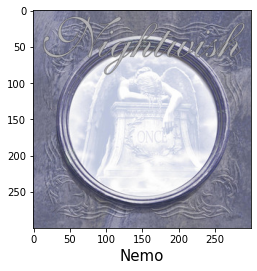

In [96]:
# Encontrando o ID
nome_musica = 'Nightwish - Nemo'
id = dados[dados['artists_song']==nome_musica]['id'].iloc[0]

# requisição na API
track = sp.track(id)
url = track["album"]["images"][1]["url"]
name = track["name"]

# Mexendo com a imagem
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 15)
plt.show()

## 5 - Recomendador

### Buscando os dados da playlist

In [97]:
def recommended_id(playlist_id):
    url = []
    name = []
    for i in playlist_id:
        track = sp.track(i)
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
    return name, url        

In [98]:
name, url = recommended_id(recomendada['id'])

In [99]:
name, url

(['Shape of You',
  'Hear Me Calling',
  'Be Kind (with Halsey)',
  'Will - Remix',
  'WRONG (feat. Lil Mosey)',
  'Paranoia (feat. Gunna & Young Thug)',
  'South of the Border (feat. Camila Cabello & Cardi B)',
  '1.5',
  'What It Is (feat. Chris Brown)',
  'G Walk (with Chris Brown)'],
 ['https://i.scdn.co/image/ab67616d00001e02ba5db46f4b838ef6027e6f96',
  'https://i.scdn.co/image/ab67616d00001e02af149eb4002f65f83afc63c4',
  'https://i.scdn.co/image/ab67616d00001e02fdf2e993e10e67396b3bf759',
  'https://i.scdn.co/image/ab67616d00001e024ac196312c24faedb76a345e',
  'https://i.scdn.co/image/ab67616d00001e02891f0552bed344dc2bfe322f',
  'https://i.scdn.co/image/ab67616d00001e0246e1307c35579c3483ea7b03',
  'https://i.scdn.co/image/ab67616d00001e0273304ce0653c7758dd94b259',
  'https://i.scdn.co/image/ab67616d00001e02280689ecc5e4b2038bb5e4bd',
  'https://i.scdn.co/image/ab67616d00001e02b46b5fb6fdc6f5c720fcb183',
  'https://i.scdn.co/image/ab67616d00001e0232ba22ba4df6a89bb6bfe3cf'])

### Gerando as imagens da  playlist

In [100]:
def visualize_songs(name, url):
    
    plt.figure(figsize=(15,10))
    columns=5
    for i, u in enumerate(url):
        # define o ax como o subplot, com a divisão que retorna inteiro do número de urls pelas colunas + 1 (no caso, 6)         
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        
        # Lendo a imagem com o Scikit Image
        image = io.imread(u)
        
        # Mostra imagem
        plt.imshow(image)
        
        # Para deixar o eixo Y invisível
        ax.get_yaxis().set_visible(False)
        
        # xticks define o local que vamos trocar os rótulos do eixo X, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color='w', fontsize=0.1)
        
        # yticks define o local que vamos trocar os rótulos do eixo Y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color='w', fontsize=0.1)
        
        # Colocando o nome da música no eixo X
        plt.xlabel(name[i], fontsize=8)
        
        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definida
        plt.tight_layout(h_pad=0.7, w_pad=0)
        
        # Ajusta os parâmetros do layput da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)
        
        # Removve os ticks - marcadores, do eixo X, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)
        
        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=None)
    plt.show()

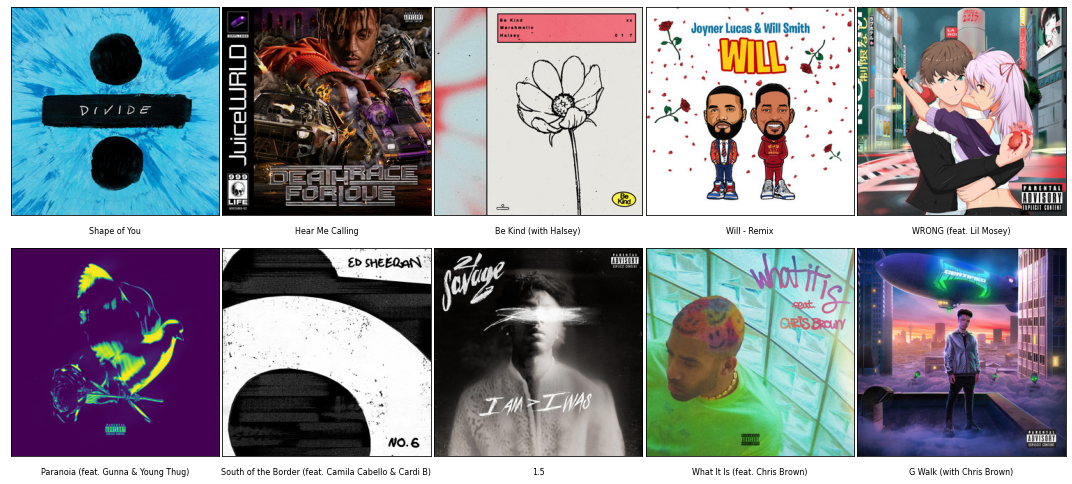

In [101]:
visualize_songs(name, url)

# 5.3 - Craindo uma função final

In [107]:
def recomendador(nome_musica):
    
    # Calculando as distâncias
    cluster = list(projection_m[projection_m['artists_song']==nome_musica]['cluster_pca'])[0]
    musicas_recomendadas = projection_m[projection_m['cluster_pca']==cluster][[0, 1, 'artists_song']]
    x_musica = list(projection_m[projection_m['artists_song']==nome_musica][0])[0]
    y_musica = list(projection_m[projection_m['artists_song']==nome_musica][1])[0]

    # distâncias euclidianas:
    distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
    musicas_recomendadas['id'] = dados['id']
    musicas_recomendadas['distancias'] = distancias
    recomendada = musicas_recomendadas.sort_values('distancias').head(10)
    
    # Acessando os dados de cada mósica com a biblioteca Spotipy (nome e imagem)
    playlist_id = recomendada['id']
    
    url = []
    name = []
    for i in playlist_id:
        track = sp.track(i)
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
        
    # Plotando as figuras
    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, 1 + i)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color='w', fontsize = 0.1)
        plt.yticks(color='w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad = 0.7, w_pad = 0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        plt.tick_params(bottom = False)
    plt.show()

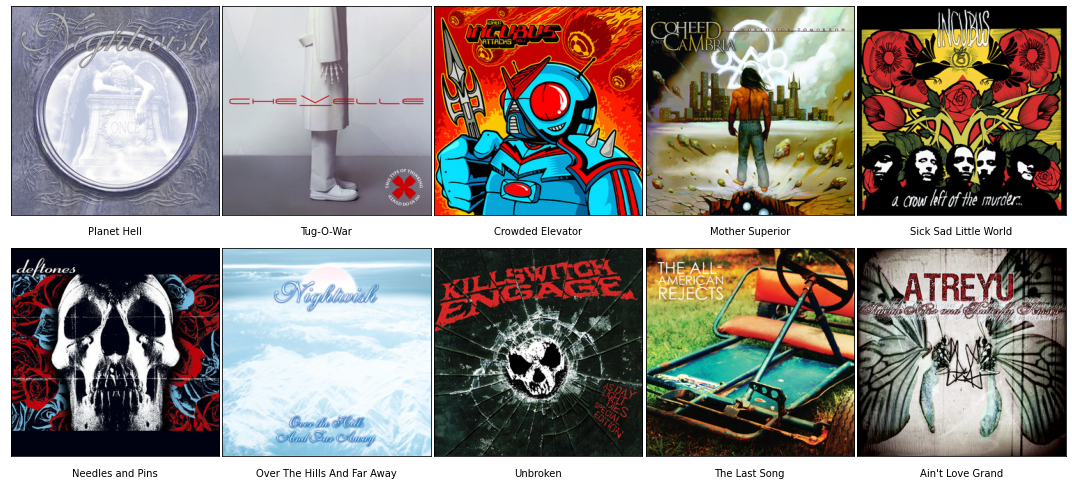

In [137]:
recomendador('Nightwish - Planet Hell')